# WHR

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [251]:
# File paths
file_paths = {
    2015: 'Data/WHR_2015.csv',
    2016: 'Data/WHR_2016.csv',
    2017: 'Data/WHR_2017.csv',
    2018: 'Data/WHR_2018.csv',
    2019: 'Data/WHR_2019.csv',
    2020: 'Data/WHR_2020.csv',
    2021: 'Data/WHR_2021.csv',
    2022: 'Data/WHR_2022.csv',
    2023: 'Data/WHR_2023.csv'
}

all_data = []

for year, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['year'] = year  # Adding the year as a column
    all_data.append(df)

# Concatenating all DataFrames
combined_data = pd.concat(all_data)
print(combined_data.head())

       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  


# Distribution

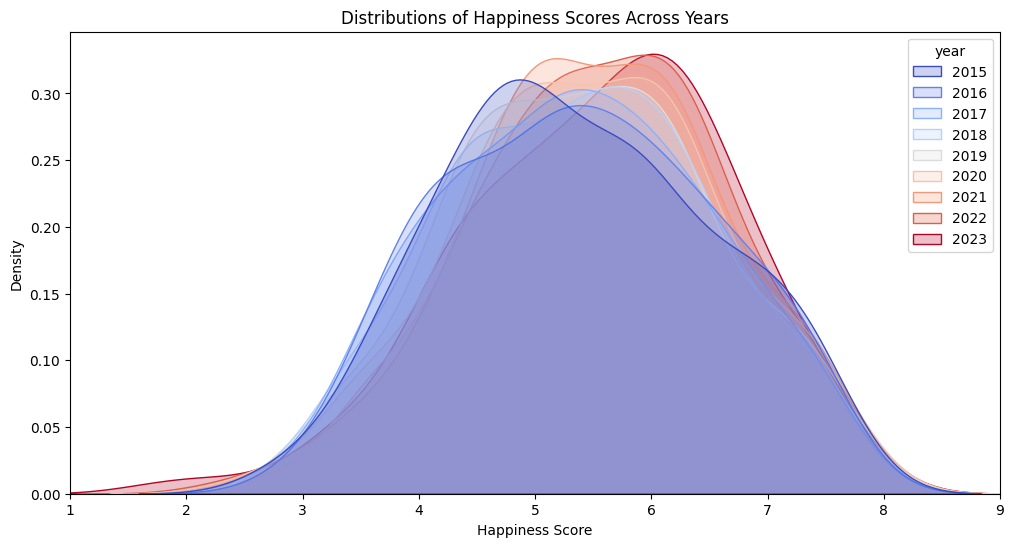

In [252]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_data, x='happiness_score', hue='year', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distributions of Happiness Scores Across Years')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.xlim(1, 9)
plt.show()

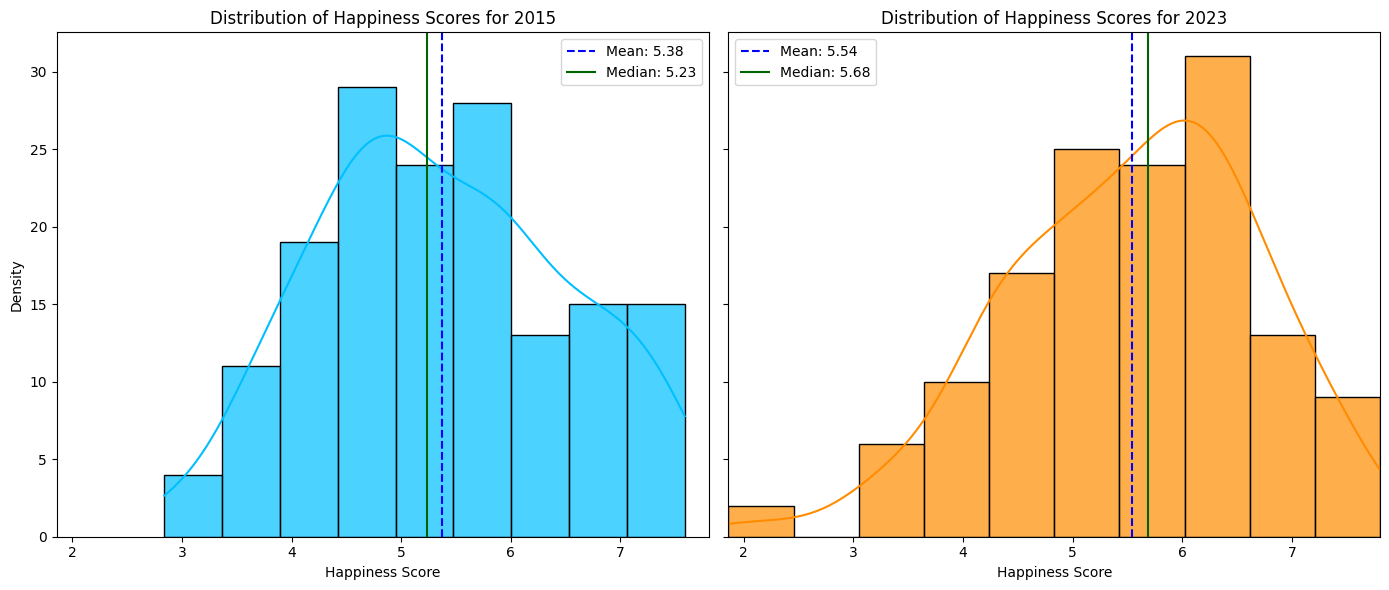

In [253]:
# Filter the data for 2015 and 2023
data_2015 = combined_data[combined_data['year'] == 2015]
data_2023 = combined_data[combined_data['year'] == 2023]

mean_2015 = data_2015['happiness_score'].mean()
median_2015 = data_2015['happiness_score'].median()

mean_2023 = data_2023['happiness_score'].mean()
median_2023 = data_2023['happiness_score'].median()

# Getting the minimum and maximum happiness_score for both years to ensure consistent x-axis limits
min_score = min(data_2015['happiness_score'].min(), data_2023['happiness_score'].min())
max_score = max(data_2015['happiness_score'].max(), data_2023['happiness_score'].max())

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=data_2015, x='happiness_score', kde=True, color='deepskyblue', alpha=0.7, ax=axes[0])
axes[0].axvline(mean_2015, color='blue', linestyle='--', label=f'Mean: {mean_2015:.2f}')
axes[0].axvline(median_2015, color='darkgreen', linestyle='-', label=f'Median: {median_2015:.2f}')
axes[0].set_title('Distribution of Happiness Scores for 2015')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Density')

axes[0].legend()


sns.histplot(data=data_2023, x='happiness_score', kde=True, color='darkorange', alpha=0.7, ax=axes[1])
axes[1].axvline(mean_2023, color='blue', linestyle='--', label=f'Mean: {mean_2023:.2f}')
axes[1].axvline(median_2023, color='darkgreen', linestyle='-', label=f'Median: {median_2023:.2f}')
axes[1].set_title('Distribution of Happiness Scores for 2023')
axes[1].set_xlabel('Happiness Score')
axes[1].legend()

axes[0].set_xlim(min_score, max_score)
axes[1].set_xlim(min_score, max_score)

plt.tight_layout()
plt.show()

# Top 10 lists

In [255]:
# Filtering data for 2023
data_2023 = combined_data[combined_data['year'] == 2023]

# Sorting the data by happiness_score in descending order to get the most happy countries
sorted_data_2023 = data_2023.sort_values(by='happiness_score', ascending=False)

top_10_happy_2023 = sorted_data_2023[['country', 'happiness_score']].head(10)

print("\nTop 10 Most Happy Countries in 2023:")
print(top_10_happy_2023)

# Grouping by country and calculate the medain happiness score for each country
median_happiness_by_country = combined_data.groupby('country')['happiness_score'].median()

sorted_median_happiness = median_happiness_by_country.sort_values(ascending=False)

top_10_happy = sorted_median_happiness.head(10)

print("\nTop 10 consistently happy countries (Highest median Happiness):")
print(top_10_happy)


Top 10 Most Happy Countries in 2023:
       country  happiness_score
0      Finland            7.804
1      Denmark            7.586
2      Iceland            7.530
3       Israel            7.473
4  Netherlands            7.403
5       Sweden            7.395
6       Norway            7.315
7  Switzerland            7.240
8   Luxembourg            7.228
9  New Zealand            7.123

Top 10 consistently happy countries (Highest median Happiness):
country
Finland        7.7690
Denmark        7.5860
Switzerland    7.5090
Iceland        7.5045
Norway         7.4980
Netherlands    7.4150
Sweden         7.3535
New Zealand    7.2996
Canada         7.2780
Australia      7.2280
Name: happiness_score, dtype: float64


In [256]:
top_10_least_happy_2023 = sorted_data_2023[['country', 'happiness_score']].tail(10).sort_values(by='happiness_score', ascending=True)

print("\nTop 10 Least Happy Countries in 2023:")
print(top_10_least_happy_2023)

top_10_least_happy = sorted_median_happiness.tail(10).sort_values(ascending=True)

print("\nTop 10 consistently least happy countries (Lowest median Happiness):")
print(top_10_least_happy)



Top 10 Least Happy Countries in 2023:
              country  happiness_score
136       Afghanistan            1.859
135           Lebanon            2.392
134      Sierra Leone            3.138
133          Zimbabwe            3.204
132  Congo (Kinshasa)            3.207
131          Botswana            3.435
130            Malawi            3.495
129           Comoros            3.545
128          Tanzania            3.694
127            Zambia            3.982

Top 10 consistently least happy countries (Lowest median Happiness):
country
Burundi                     2.9050
Central African Republic    3.0830
Afghanistan                 3.2030
South Sudan                 3.2540
Rwanda                      3.4115
Syria                       3.4620
Botswana                    3.4880
Malawi                      3.6000
Haiti                       3.6150
Tanzania                    3.6230
Name: happiness_score, dtype: float64


# Scores by region

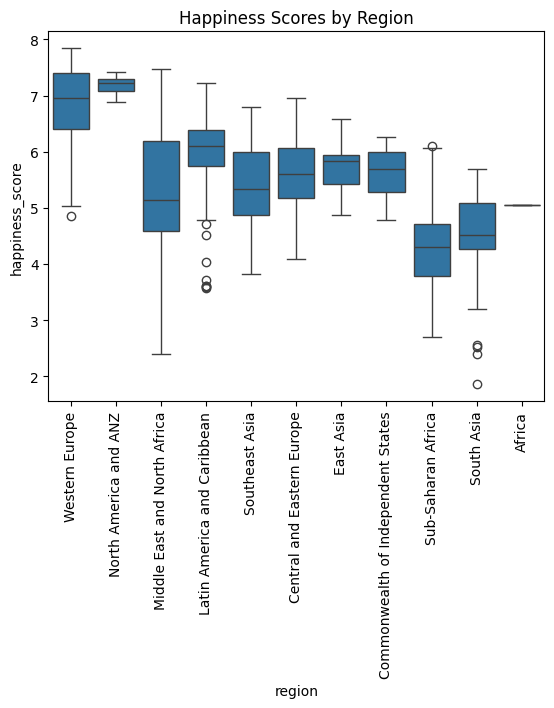

In [257]:
sns.boxplot(x='region', y='happiness_score', data=combined_data)
plt.xticks(rotation=90)
plt.title('Happiness Scores by Region')
plt.show()

In [258]:
# Defining a mapping from regions to continents
region_to_continent = {
    'Western Europe': 'Europe',
    'Central and Eastern Europe': 'Europe',
    'Southeast Asia': 'Asia',
    'East Asia': 'Asia',
    'South Asia': 'Asia',
    'Africa': 'Africa',
    'Sub-Saharan Africa': 'Africa',
    'Middle East and North Africa': 'Africa',
    'Latin America and Caribbean': 'South America',
    'Commonwealth of Independent States': 'Asia'   
}

# Special handling for "North America and ANZ"
def assign_continent(row):
    if row['region'] == 'North America and ANZ':
        if row['country'] in ['United States', 'Canada']:  # Countries in North America
            return 'North America'
        elif row['country'] in ['Australia', 'New Zealand']:  # Countries in Oceania
            return 'Oceania'
    # Default mapping for other regions
    return region_to_continent.get(row['region'], 'Unknown')

# Apply the logic to create a 'continent' column
combined_data['continent'] = combined_data.apply(assign_continent, axis=1)

# Check the result
#print(combined_data[['country', 'region', 'continent']].drop_duplicates())

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Avoid line truncation
pd.set_option('display.max_colwidth', None)  # Display full column contents

# Now print the data
print(combined_data[['country', 'region', 'continent']].drop_duplicates())

                       country                              region  \
0                  Switzerland                      Western Europe   
1                      Iceland                      Western Europe   
2                      Denmark                      Western Europe   
3                       Norway                      Western Europe   
4                       Canada               North America and ANZ   
5                      Finland                      Western Europe   
6                  Netherlands                      Western Europe   
7                       Sweden                      Western Europe   
8                  New Zealand               North America and ANZ   
9                    Australia               North America and ANZ   
10                      Israel        Middle East and North Africa   
11                  Costa Rica         Latin America and Caribbean   
12                     Austria                      Western Europe   
13                  

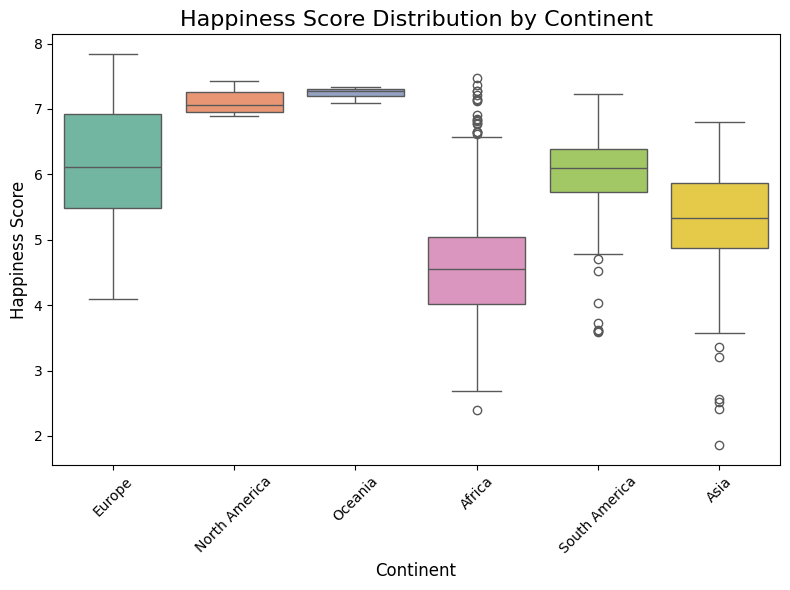

In [259]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, y='happiness_score', x='continent', hue='continent', dodge=False, palette='Set2', legend=False)

plt.title('Happiness Score Distribution by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


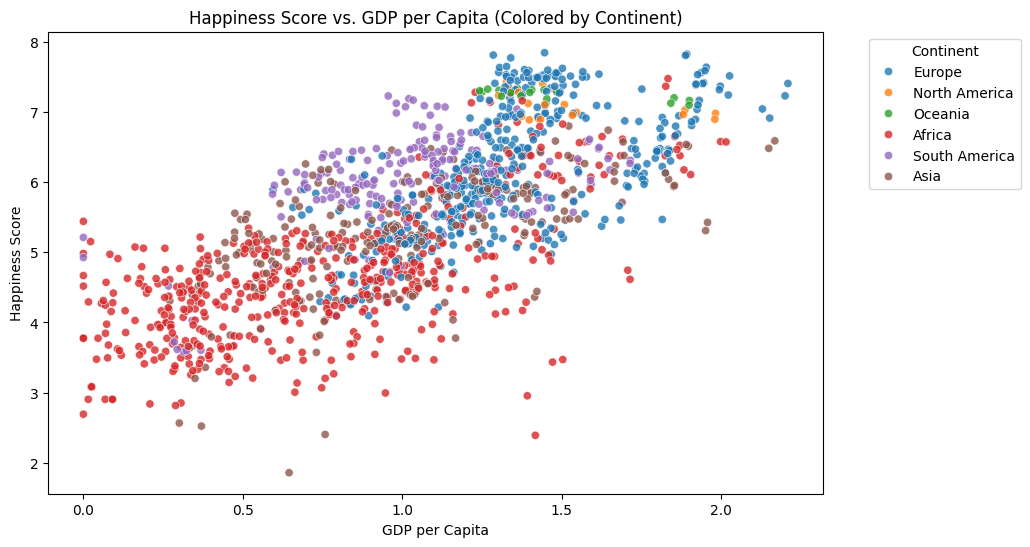

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two important variables for the scatterplot
x_var = "gdp_per_capita"  # X-axis: GDP per Capita
y_var = "happiness_score"  # Y-axis: Happiness Score

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x=x_var, y=y_var, hue="continent", palette="tab10", alpha=0.8)

# Customize the plot
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs. GDP per Capita (Colored by Continent)")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


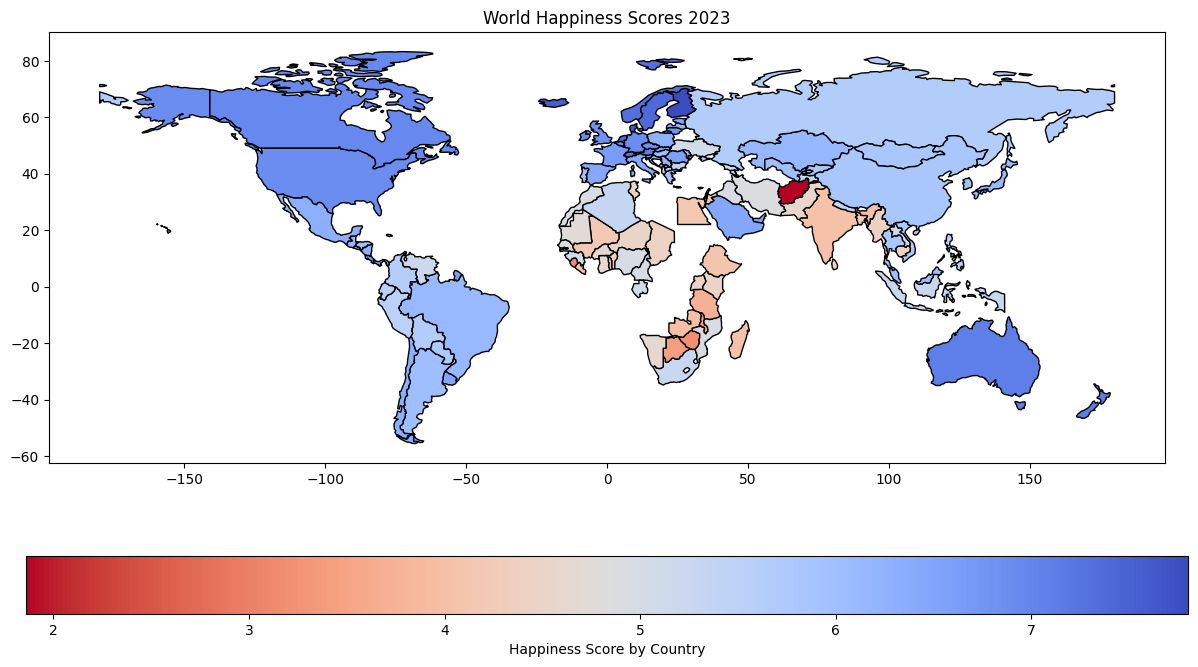

In [261]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the world shapefile using GeoPandas
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter data_cleaned for the year 2023
data_2023 = data_cleaned[data_cleaned['year'] == 2023]

world['NAME'] = world['NAME'].replace({'United States of America': 'United States'})

world = world.merge(data_2023[['country', 'happiness_score']], left_on='NAME', right_on='country', how='left')


# Create a colormap: the darker red is the min happiness score, darker blue is the max
ax = world.plot(column='happiness_score', 
                cmap='coolwarm_r', # This colormap transitions from dark red to dark blue
                legend=True, 
                legend_kwds={'label': "Happiness Score by Country",
                             'orientation': "horizontal"},
                figsize=(15, 8),
                edgecolor='black')  # Add black border lines to each country

# Set the title
plt.title('World Happiness Scores 2023')
plt.show()



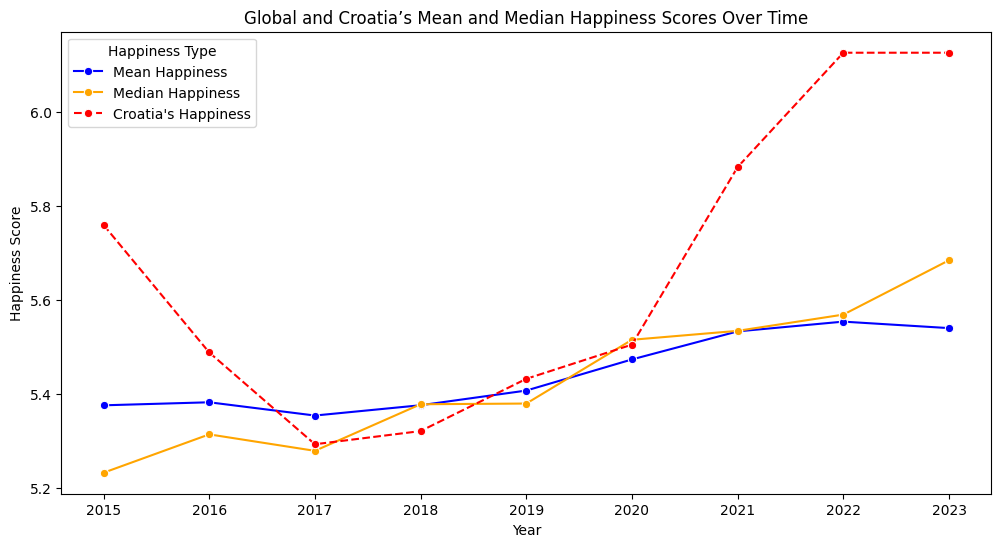

In [262]:

# Grouping by year and calculating the mean and median happiness score
happiness_by_year = combined_data.groupby('year')['happiness_score'].agg(['mean', 'median'])

croatia_data = combined_data[combined_data['country'] == 'Croatia']
croatia_by_year = croatia_data[['year', 'happiness_score']]

plt.figure(figsize=(12, 6))
sns.lineplot(x=happiness_by_year.index, y=happiness_by_year['mean'], label='Mean Happiness', color='blue', marker='o')
sns.lineplot(x=happiness_by_year.index, y=happiness_by_year['median'], label='Median Happiness', color='orange', marker='o')

sns.lineplot(x=croatia_by_year['year'], y=croatia_by_year['happiness_score'], label="Croatia's Happiness", color='red', marker='o', linestyle='--')

plt.title('Global and Croatia’s Mean and Median Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')

plt.legend(title='Happiness Type')

plt.show()

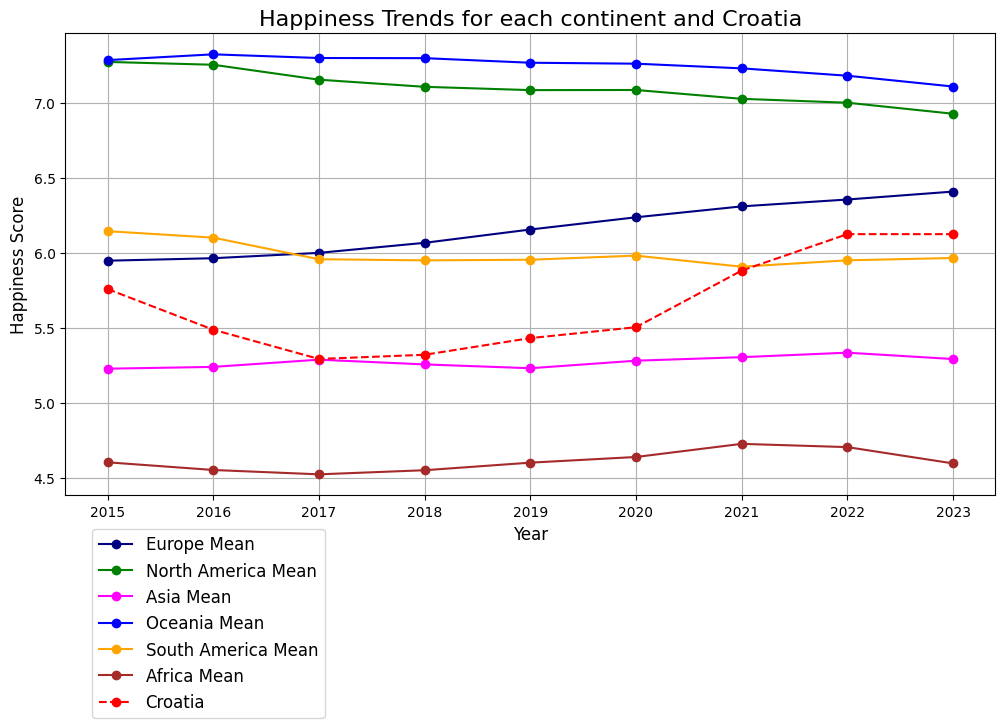

In [263]:

# Filter the dataset for Europe
europe_data = combined_data[combined_data['continent'] == 'Europe']
NA_data = combined_data[combined_data['continent'] == 'North America']
Asia_data = combined_data[combined_data['continent'] == 'Asia']
Oceania_data = combined_data[combined_data['continent'] == 'Oceania']
SA_data = combined_data[combined_data['continent'] == 'South America']
Africa_data = combined_data[combined_data['continent'] == 'Africa']

# Calculate mean and median happiness scores for continents by year
europe_mean = europe_data.groupby('year')['happiness_score'].mean()
NA_mean = NA_data.groupby('year')['happiness_score'].mean()
Asia_mean = Asia_data.groupby('year')['happiness_score'].mean()
Oceania_mean = Oceania_data.groupby('year')['happiness_score'].mean()
SA_mean = SA_data.groupby('year')['happiness_score'].mean()
Africa_mean = Africa_data.groupby('year')['happiness_score'].mean()
#europe_median = europe_data.groupby('year')['happiness_score'].median()

# Filter the dataset for Croatia
croatia_data = combined_data[combined_data['country'] == 'Croatia']
croatia_scores = croatia_data[['year', 'happiness_score']].set_index('year')

# Plot the chart
plt.figure(figsize=(12, 6))

# Plot Europe mean and median
plt.plot(europe_mean.index, europe_mean.values, label='Europe Mean', marker='o', linestyle='-', color='navy')
plt.plot(NA_mean.index, NA_mean.values, label='North America Mean', marker='o', linestyle='-', color='green')
plt.plot(Asia_mean.index, Asia_mean.values, label='Asia Mean', marker='o', linestyle='-', color='magenta')
plt.plot(Oceania_mean.index, Oceania_mean.values, label='Oceania Mean', marker='o', linestyle='-', color='blue')
plt.plot(SA_mean.index, SA_mean.values, label='South America Mean', marker='o', linestyle='-', color='orange')
plt.plot(Africa_mean.index, Africa_mean.values, label='Africa Mean', marker='o', linestyle='-', color='brown')


# Plot Croatia happiness scores
plt.plot(croatia_scores.index, croatia_scores['happiness_score'], label='Croatia', marker='o', linestyle='--', color='red')

# Add labels, title, and legend
plt.title('Happiness Trends for each continent and Croatia', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.02, -0.5))
plt.grid(True)
#plt.tight_layout()
plt.show()


# Correlation and predictive models

In [264]:
# Features and Target Variable Selection
features = [
    'gdp_per_capita', 
    'social_support', 
    'healthy_life_expectancy', 
    'freedom_to_make_life_choices', 
    'generosity', 
    'perceptions_of_corruption'
]

target = 'happiness_score'

# Drop rows where either features or target are missing
data_cleaned = combined_data.dropna(subset=features + [target])
#print(f"Cleaned data:{data_cleaned}")
# Prepare X and y ensuring proper alignment
X = data_cleaned[features]
y = data_cleaned[target]

# Confirm shapes to avoid mismatch error
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data for training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Shape of X: (1365, 6)
Shape of y: (1365,)


In [265]:
missing_values = combined_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
continent                       0
dtype: int64


happiness_score                 1.000000
gdp_per_capita                  0.723810
healthy_life_expectancy         0.682400
social_support                  0.648155
freedom_to_make_life_choices    0.569458
perceptions_of_corruption       0.415071
generosity                      0.082345
Name: happiness_score, dtype: float64


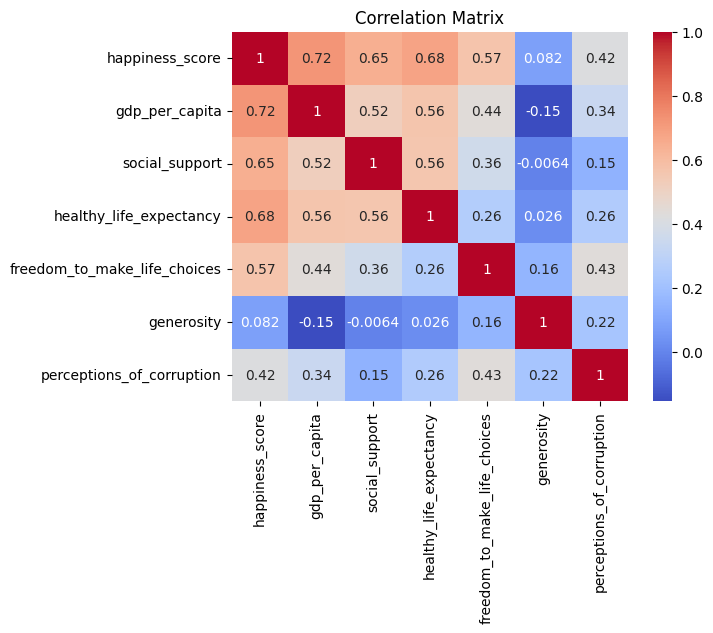

In [266]:
numeric_data = combined_data.select_dtypes(include=['float64'])

correlation_matrix = numeric_data.corr()
happines_corr = correlation_matrix['happiness_score'].sort_values(ascending=False)

print(happines_corr)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Epoch 1/100


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7771 - val_loss: 0.7150
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6958 - val_loss: 0.6308
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5543 - val_loss: 0.5587
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5040 - val_loss: 0.4953
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4309 - val_loss: 0.4444
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4271 - val_loss: 0.4023
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3529 - val_loss: 0.3713
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3264 - val_loss: 0.3489
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2818 - val_loss: 0.3332
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2725 - val_loss: 0.3220
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2767 - val_loss: 0.3141
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2436 - val_l

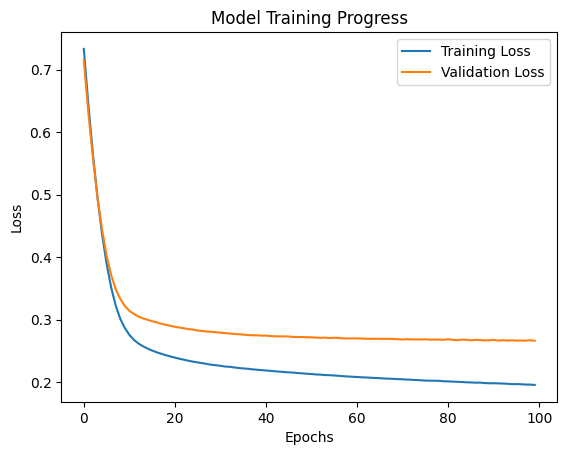

In [267]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Drop non-numeric columns and separate features/target
data = data_cleaned.drop(columns=['country', 'continent', 'year', 'region'])

# Separating target (happiness_score) and features
y = data['happiness_score']
X = data.drop(columns=['happiness_score'])

# Train-test split (70% train, 30% test for example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Standardize the data (important for neural networks)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for predicting happiness score

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model with a progress bar and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_scaled, 
                    epochs=100, batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Evaluate model performance
r2 = r2_score(y_test_original, y_pred)
print(f"R² Score: {r2:.2f}")

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Progress')
plt.show()


In [272]:
custom_input = np.array([[1.727,1.455,0.475,0.5,0.087,0.003]])  # Adjust these values

# Scale the custom input using the same scaler
custom_input_scaled = scaler_X.transform(custom_input)

predicted_scaled = model.predict(custom_input_scaled)

# Convert the prediction back to the original scale
predicted_happiness = scaler_y.inverse_transform(predicted_scaled)

print(f"Predicted Happiness Score: {predicted_happiness[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Happiness Score: 6.04


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [269]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

e=LabelEncoder()
#Drop non-numeric columns and separate features/target
#
data_cleaned.head()
df = data_cleaned.drop(columns=['country', 'continent', 'year', 'region'])

# df['region']=e.fit_transform(df['region'])
# df.head()



from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

y=df['happiness_score']
x=df.copy()
x.drop('happiness_score',axis=1,inplace=True)

from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()

xs=s.fit_transform(x)
x=pd.DataFrame(xs,columns=x.columns)
x.head()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

for i in models:
        create_model(i)

print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.3477992834116264
Mean squared error 0.20048176658988753
Root Mean squared error 0.4477519029439043
R2 Score 0.790297566159897
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.34621640460939607
Mean squared error 0.19459189418236567
Root Mean squared error 0.44112571244755805
R2 Score 0.7964583288061661
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.4576062295458925
Mean squared error 0.39843877557252705
Root Mean squared error 0.6312200690508241
R2 Score 0.5832360099621947
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.38592622949400734
Mean squared error 0.2494286769105548
Root Mean squared error 0.49942835012697745
R2 Score 0.7390994627224201
-------------

c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 0.3705
R² Score: 0.8108


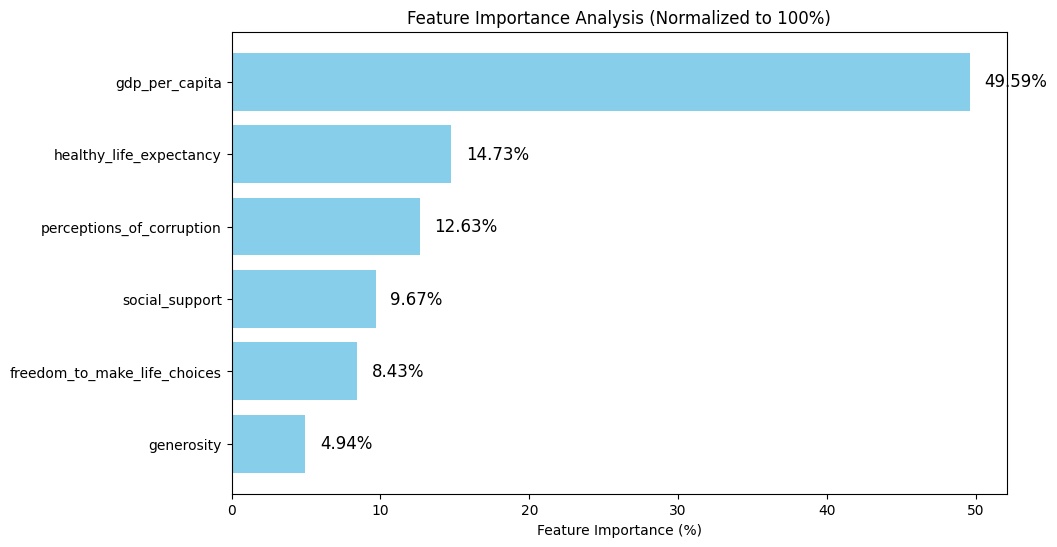

                        Feature  Importance
0                gdp_per_capita   49.592766
2       healthy_life_expectancy   14.728549
5     perceptions_of_corruption   12.633302
1                social_support    9.674164
3  freedom_to_make_life_choices    8.429486
4                    generosity    4.941734


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Drop the non-numeric columns and separate features/target
data = data_cleaned.drop(columns=['country', 'continent', 'year', 'region'])

# Separating target and features
y = data['happiness_score']
X = data.drop(columns=['happiness_score'])

# Scale the features (X) and target (y)
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features
X_scaled = feature_scaler.fit_transform(X)

# Scale the target
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=7)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=7)
rf_model.fit(X_train, y_train)

# Predict the happiness scores on the test set
y_pred_scaled = rf_model.predict(X_test)

# Inverse transform the predictions to get the original scale of happiness score
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test)

# Calculate Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Get feature importances from the trained RandomForestRegressor model
importances = rf_model.feature_importances_

# Normalize the importances to 100%
importances_normalized = 100 * (importances / importances.sum())

# Create a DataFrame to visualize feature importances and their percentage
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_normalized
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the normalized feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Add text annotations to each bar
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Position the text to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the text
        f'{bar.get_width():.2f}%',  # Format the text as percentage
        va='center', ha='left', fontsize=12  # Text alignment
    )

plt.xlabel('Feature Importance (%)')
plt.title('Feature Importance Analysis (Normalized to 100%)')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()

# Print out the feature importance DataFrame
print(feature_importance_df)


In [273]:
# Define a function to predict happiness score based on user input
def predict_happiness(gdp, social_support, life_expectancy, freedom, generosity, corruption):
    # Prepare the input features for prediction (in the same format as the training data)
    input_data = pd.DataFrame([[gdp, social_support, life_expectancy, freedom, generosity, corruption]],
                              columns=X.columns)
    
    # Scale the input data using the same scaler as during training
    input_scaled = feature_scaler.transform(input_data)
    
    # Predict the happiness score (scaled)
    predicted_scaled = rf_model.predict(input_scaled)
    
    # Inverse transform the prediction to get the original scale of happiness score
    predicted_happiness = target_scaler.inverse_transform(predicted_scaled.reshape(-1, 1))
    
    # Return the predicted happiness score on the original scale
    return predicted_happiness[0][0]

# Example usage
predicted_happiness = predict_happiness(
    gdp=1.727, 
    social_support=1.455, 
    life_expectancy=0.475, 
    freedom=0.5, 
    generosity=0.087, 
    corruption=0.003
)

print(f"Predicted Happiness Score: {predicted_happiness:.2f}")

Predicted Happiness Score: 6.18
